In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
fileName = "/content/creditcard.csv"
dataset = read_csv(fileName)

In [ ]:
print(dataset.shape)
print(dataset.head(20))
print(dataset.describe())

(35742, 31)
    Time        V1        V2        V3        V4        V5        V6  \
0      0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1      0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2      1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3      1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4      2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5      2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6      4  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7      7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8      7 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9      9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10    10  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11    10  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12    10  1.249999 -1.221637  0.383930 -1.234899 -1.

In [ ]:
dataset.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6         True
V7         True
V8         True
V9         True
V10        True
V11        True
V12        True
V13        True
V14        True
V15        True
V16        True
V17        True
V18        True
V19        True
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [ ]:
nfcount=0

notFraud=dataset['Class']

for i in range(len(notFraud)):

  if notFraud[i]==0:

    nfcount=nfcount+1

nfcount

per_nf=(nfcount/len(notFraud))*100

print('percentage of total not fraud transaction in the dataset: ',per_nf)

percentage of total not fraud transaction in the dataset:  99.70902579598231


In [ ]:
fcount=0

Fraud=dataset['Class']

for i in range(len(Fraud)):

  if Fraud[i]==1:

    fcount=fcount+1

fcount

per_f=(fcount/len(Fraud))*100

print('percentage of total fraud transaction in the dataset: ',per_f)

percentage of total fraud transaction in the dataset:  0.28817637513289684


Text(0.5, 1.0, 'Time Vs amount')

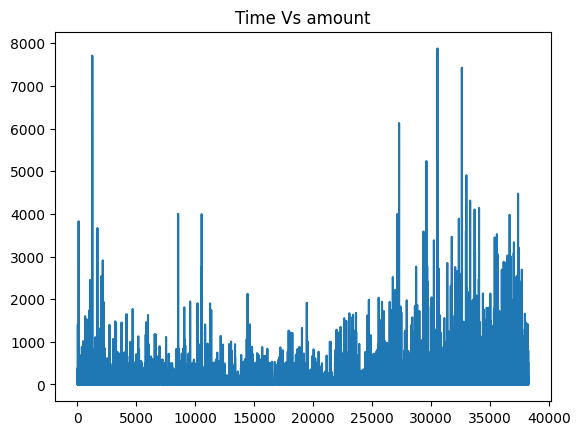

In [ ]:
x=dataset['Time']

y=dataset['Amount']

plt.plot(x, y)

plt.title('Time Vs amount')


<ipython-input-10-13d8f562ac4c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Amount'],color='red');


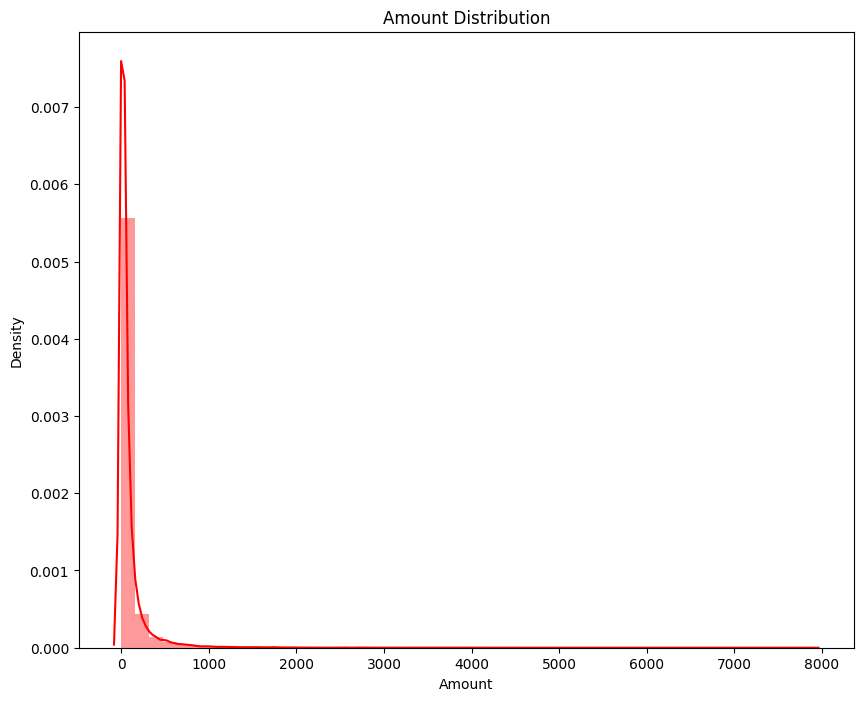

In [ ]:
plt.figure(figsize=(10,8), )

plt.title('Amount Distribution')

sns.distplot(dataset['Amount'],color='red');

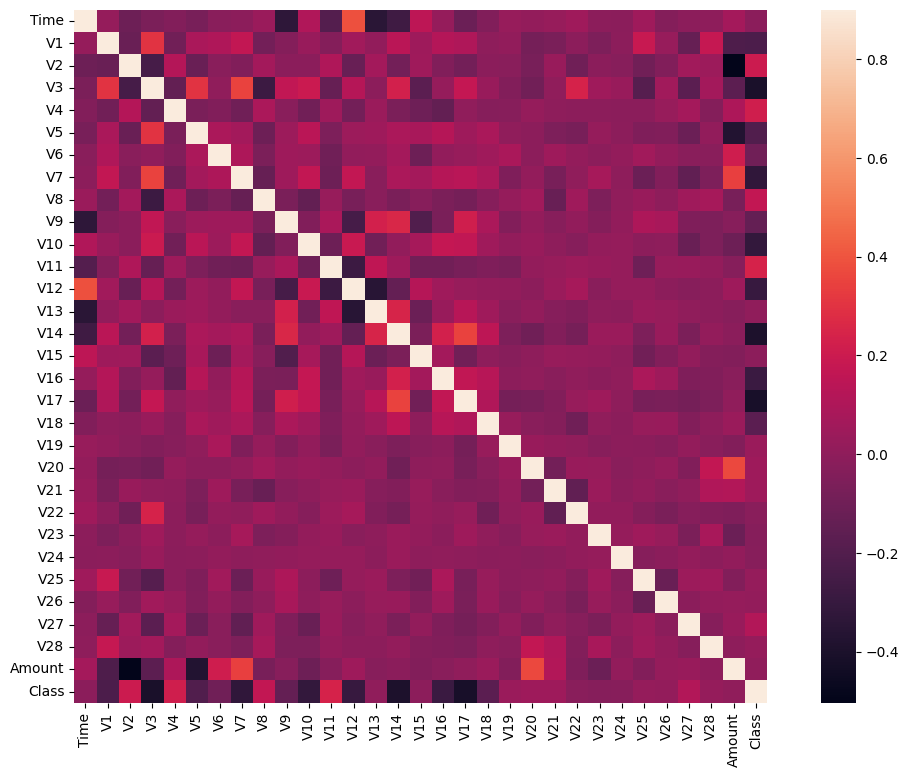

In [ ]:
correlation_metrics = dataset.corr()

fig = plt.figure(figsize = (14, 9))

sns.heatmap(correlation_metrics, vmax = .9, square = True)

plt.show()

In [ ]:
x=dataset.drop(['Class'], axis = 1)#drop the target variable

y=dataset['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

linear =LinearRegression()

linear.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
y_pred = linear.predict(xtest)

table= pd.DataFrame({"Actual":ytest,"Predicted":y_pred})

table

ValueError: ignored